In [1]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Edyoda\ML Rishi Bansal\Assignments\Assignment 1\House Rental Data.txt',index_col = 0 )

In [7]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


We can see that all the columns are numeric, so lets look at the descriptive statistics.

In [8]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


Let's Check for missing values and then see the distributions of our features!

In [13]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

Seems like no missing values here.

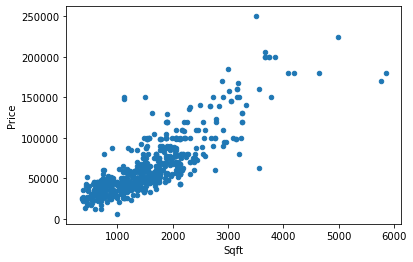

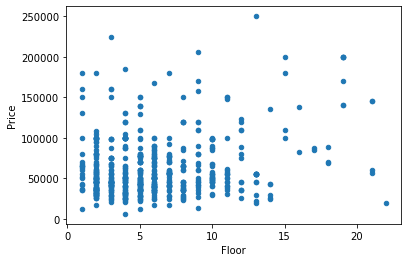

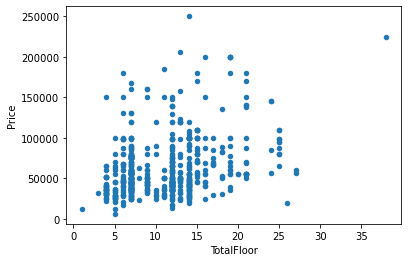

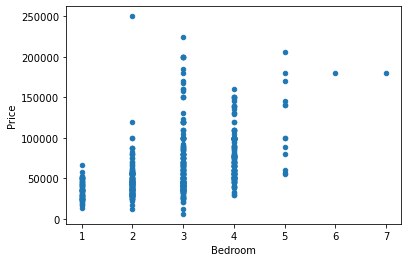

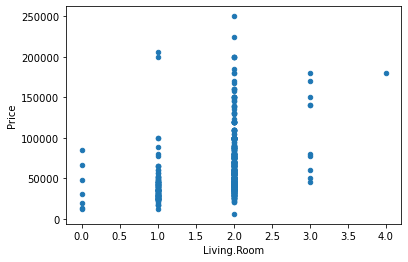

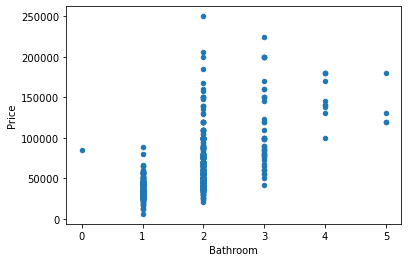

In [31]:
#Lets plot the data and see its variantion with the target variable.
cols = df.columns
for i in cols[:-1]:
    df.plot(i,'Price', kind = 'scatter')

As we can see, most of them are numeric variables but they are actally categorical features disguised as numbers!

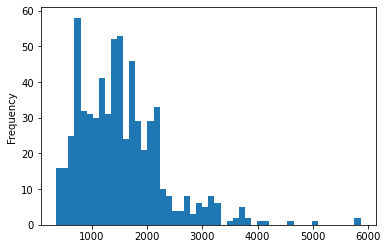

In [43]:
df['Sqft'].plot.hist(bins = 50)

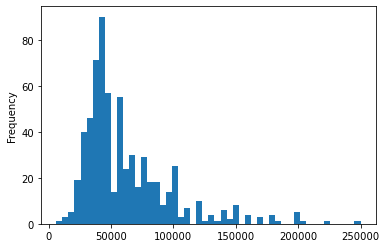

In [44]:
df['Price'].plot.hist(bins = 50)

It seems sqft and Price(Our target variable) are going hand in hand.
Let's see the correlation between these variables!

In [47]:
corr = df.corr()
corr

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


Sqft and Bathroom have high correlation with the target var!

In [48]:
import seaborn as sns

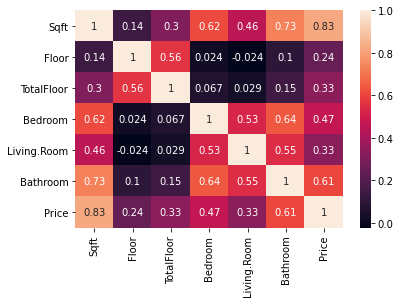

In [55]:
sns.heatmap(corr, annot = True)

So bathroom and sqft features have high correlation among them as well, so we shall drop bathroom feature while building the model

In [64]:
#Lets build the model! We are taking till -2 because the last two features are bathroom(which we are dropping) and target var
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

Let's split the data into train and test set!

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

Let's first scale all the features and then see the result and then we will scale only the quantitative data(sqft) and not the categorical vars

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
#Lets see the results for n_neighbors from 2 to 25
from sklearn.neighbors import KNeighborsRegressor
preds = []
for i in range(2,25):
    nn_model = KNeighborsRegressor(n_neighbors = i)
    nn_model.fit(X_train,y_train)
    y_pred = nn_model.predict(X_test)
    preds.append({'N_Neighbors':i,'Train Score':nn_model.score(X_train,y_train),'Test_Score':nn_model.score(X_test,y_test)})

In [69]:
preds

[{'N_Neighbors': 2,
  'Train Score': 0.8867945662260287,
  'Test_Score': 0.7332926684664327},
 {'N_Neighbors': 3,
  'Train Score': 0.8354208760115128,
  'Test_Score': 0.7010279087121665},
 {'N_Neighbors': 4,
  'Train Score': 0.8129987966298197,
  'Test_Score': 0.7012711924769801},
 {'N_Neighbors': 5,
  'Train Score': 0.783809311816156,
  'Test_Score': 0.6991570972793312},
 {'N_Neighbors': 6,
  'Train Score': 0.7806322965215253,
  'Test_Score': 0.7002178009967581},
 {'N_Neighbors': 7,
  'Train Score': 0.7630558067764766,
  'Test_Score': 0.6977436434877016},
 {'N_Neighbors': 8,
  'Train Score': 0.7504757563522697,
  'Test_Score': 0.6950573606645665},
 {'N_Neighbors': 9,
  'Train Score': 0.742244878262277,
  'Test_Score': 0.6819640473899391},
 {'N_Neighbors': 10,
  'Train Score': 0.7332409015092696,
  'Test_Score': 0.6655298974268604},
 {'N_Neighbors': 11,
  'Train Score': 0.7247207182835202,
  'Test_Score': 0.6645058468558322},
 {'N_Neighbors': 12,
  'Train Score': 0.7146252855560333,
  

The results are average! Best result we have is 70%! 

Now let's try while scaling only one var! That is the sqft var!


In [70]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Edyoda\ML Rishi Bansal\Assignments\Assignment 1\House Rental Data.txt',index_col = 0 )

In [84]:
from sklearn.preprocessing import scale
df['Sqft'] = scale(df['Sqft'])

In [85]:
#Lets build the model! We are taking till -2 because the last two features are bathroom(which we are dropping) and target var
X = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [87]:
#Lets see the results for n_neighbors from 2 to 25
from sklearn.neighbors import KNeighborsRegressor
preds = []
for i in range(2,25):
    nn_model = KNeighborsRegressor(n_neighbors = i)
    nn_model.fit(X_train,y_train)
    y_pred = nn_model.predict(X_test)
    preds.append({'N_Neighbors':i,'Train Score':nn_model.score(X_train,y_train),'Test_Score':nn_model.score(X_test,y_test)})

In [88]:
preds

[{'N_Neighbors': 2,
  'Train Score': 0.8648443646086513,
  'Test_Score': 0.683623095391358},
 {'N_Neighbors': 3,
  'Train Score': 0.8029268122178859,
  'Test_Score': 0.6223236629487781},
 {'N_Neighbors': 4,
  'Train Score': 0.7318591270567486,
  'Test_Score': 0.5743216237040027},
 {'N_Neighbors': 5,
  'Train Score': 0.7123149969612483,
  'Test_Score': 0.583401237723995},
 {'N_Neighbors': 6,
  'Train Score': 0.702559037223588,
  'Test_Score': 0.5692029734658337},
 {'N_Neighbors': 7,
  'Train Score': 0.6766500508976481,
  'Test_Score': 0.5406337711170645},
 {'N_Neighbors': 8,
  'Train Score': 0.642754853818102,
  'Test_Score': 0.541620209250991},
 {'N_Neighbors': 9,
  'Train Score': 0.6166953727689627,
  'Test_Score': 0.546153180432834},
 {'N_Neighbors': 10,
  'Train Score': 0.5971967157420708,
  'Test_Score': 0.5417157574287048},
 {'N_Neighbors': 11,
  'Train Score': 0.5896003159952442,
  'Test_Score': 0.526583068830726},
 {'N_Neighbors': 12,
  'Train Score': 0.5698596283950215,
  'Test

The results are much worse! So it was better to scale the entire independant features and not just Sqft feature!